In [1]:
import json
import re
import matplotlib.pyplot as plt
from utils import collapse_annotations
import numpy as np
import random

In [2]:
train_set = json.load(open('train.json'))
dev_set = json.load(open('dev.json'))
test_set = json.load(open('test.json'))
data_all = train_set | dev_set | test_set

In [3]:
def get_word_gender_map(wordsfile = "/juice/scr/rtaori/imsitu_data/words.txt"):
    word_map = {}
    wordmap2 = {}
    M = ['man']
    F = ['woman']
    with open(wordsfile) as words_f:
        for line in words_f:
            words = line.strip().split('\t')
            word_map[words[0]] = words[1]
            all_words = re.split(' |, ', words[1])
            gender = set()
            for m in M:
                if m in all_words:
                    gender.add('m')
                    break
            for f in F:
                if f in all_words:
                    gender.add('f')
                    break
            tmp = ''.join(list(gender))
            wordmap2[words[0]] = tmp
        wordmap2['null'] = 'null'
    return word_map, wordmap2

In [4]:
word_map, wordmap2 = get_word_gender_map()
male_nouns, female_nouns = [], []
for noun_id, gender in wordmap2.items():
    if gender == 'm':
        male_nouns.append(noun_id)
    if gender == 'f':
        female_nouns.append(noun_id)

In [5]:
verb_counts = {}
for i, (image, info) in enumerate(data_all.items()):
    agents = [frame['agent'] for frame in info['frames'] if 'agent' in frame]
    if len(agents) == 0:
        continue
    verb = info['verb']
    if verb not in verb_counts:
        verb_counts[verb] = {'man': 0, 'woman': 0}
    is_man = any(noun in agents for noun in male_nouns)
    is_woman = any(noun in agents for noun in female_nouns)
    if is_man and not is_woman:
        verb_counts[verb]['man'] += 1
    if is_woman and not is_man:
        verb_counts[verb]['woman'] += 1

In [6]:
sum(x['woman'] for x in verb_counts.values()) / (sum(x['woman'] for x in verb_counts.values()) + sum(x['man'] for x in verb_counts.values()))

0.4111511387787709

(array([18.,  7.,  3.,  3.,  5.,  0.,  3.,  1.,  8.,  2.,  3.,  2.,  0.,
         2.,  3.,  3.,  4.,  1.,  2.,  5.,  4.,  3.,  6.,  5.,  2.,  5.,
         1.,  4.,  4.,  5.,  5.,  2.,  4., 12.,  6.,  3.,  8.,  8.,  5.,
         7., 10., 12.,  4.,  7., 10.,  6., 13., 12.,  9., 10., 10., 11.,
        12.,  6.,  7., 13.,  7.,  6.,  5., 12.,  6.,  7.,  6.,  5.,  3.,
        10.,  7.,  4.,  8.,  3.,  7.,  9.,  2.,  5.,  2.,  6.,  2.,  2.,
         1.,  3.,  1.,  3.,  3.,  1.,  2.,  1.,  1.,  3.,  2.,  4.,  1.,
         2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  3.]),
 array([  0.  ,   3.03,   6.06,   9.09,  12.12,  15.15,  18.18,  21.21,
         24.24,  27.27,  30.3 ,  33.33,  36.36,  39.39,  42.42,  45.45,
         48.48,  51.51,  54.54,  57.57,  60.6 ,  63.63,  66.66,  69.69,
         72.72,  75.75,  78.78,  81.81,  84.84,  87.87,  90.9 ,  93.93,
         96.96,  99.99, 103.02, 106.05, 109.08, 112.11, 115.14, 118.17,
        121.2 , 124.23, 127.26, 130.29, 133.32, 136.35, 139.38, 142.41,
  

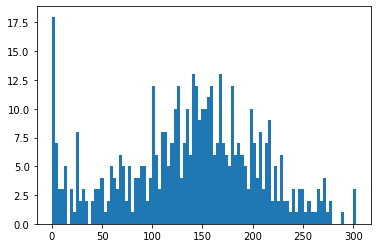

In [7]:
plt.hist([x['woman']+x['man'] for x in verb_counts.values()], bins=100)

In [8]:
min_num_frames = 30

In [9]:
verb_ratios = {verb: counts['woman'] / (counts['man'] + counts['woman']) for verb, counts in verb_counts.items() if counts['man'] + counts['woman'] > min_num_frames}

In [10]:
[(k, v, sum(verb_counts[k].values())) for k, v in sorted(verb_ratios.items(), key=lambda x: x[1], reverse=True)]

[('cheerleading', 1.0, 70),
 ('curtsying', 0.989010989010989, 182),
 ('manicuring', 0.9722222222222222, 180),
 ('curling', 0.9622641509433962, 159),
 ('braiding', 0.9261744966442953, 149),
 ('moisturizing', 0.9035087719298246, 228),
 ('waxing', 0.8983050847457628, 59),
 ('nagging', 0.8897058823529411, 136),
 ('calming', 0.8654970760233918, 171),
 ('coloring', 0.8571428571428571, 49),
 ('spinning', 0.8561643835616438, 146),
 ('sewing', 0.8387096774193549, 155),
 ('fetching', 0.8305084745762712, 59),
 ('bathing', 0.8297872340425532, 94),
 ('arranging', 0.8296943231441049, 229),
 ('arching', 0.826530612244898, 196),
 ('dusting', 0.8194444444444444, 216),
 ('giggling', 0.8154761904761905, 168),
 ('buttering', 0.7941176470588235, 68),
 ('combing', 0.7932960893854749, 179),
 ('brushing', 0.7916666666666666, 192),
 ('applying', 0.7913907284768212, 302),
 ('grieving', 0.7875, 160),
 ('shopping', 0.7865612648221344, 253),
 ('shelling', 0.7764705882352941, 85),
 ('microwaving', 0.775862068965517

(array([ 9.,  5., 13., 13., 12., 11.,  9., 11., 18., 18., 13., 20., 13.,
        25., 14., 23., 13., 13., 19., 18., 12., 23.,  8., 18., 10.,  6.,
        13.,  8.,  5.,  5., 10.,  6.,  3.,  4.,  3.,  2.,  1.,  1.,  2.,
         2.]),
 array([0.01183432, 0.03653846, 0.0612426 , 0.08594675, 0.11065089,
        0.13535503, 0.16005917, 0.18476331, 0.20946746, 0.2341716 ,
        0.25887574, 0.28357988, 0.30828402, 0.33298817, 0.35769231,
        0.38239645, 0.40710059, 0.43180473, 0.45650888, 0.48121302,
        0.50591716, 0.5306213 , 0.55532544, 0.58002959, 0.60473373,
        0.62943787, 0.65414201, 0.67884615, 0.7035503 , 0.72825444,
        0.75295858, 0.77766272, 0.80236686, 0.82707101, 0.85177515,
        0.87647929, 0.90118343, 0.92588757, 0.95059172, 0.97529586,
        1.        ]),
 <BarContainer object of 40 artists>)

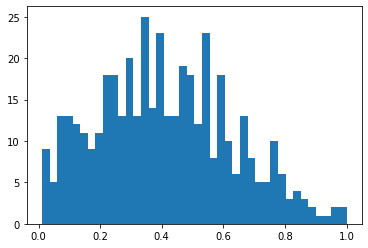

In [11]:
plt.hist(verb_ratios.values(), bins=40)

In [12]:
num_intervals = 5
ratio_intervals = np.linspace(0, 1, num_intervals+1)
interval_words = [[] for _ in range(num_intervals)]
for verb, ratio in sorted(verb_ratios.items(), key=lambda x: x[1]):
    for i in range(num_intervals):
        if ratio > ratio_intervals[i] and ratio <= ratio_intervals[i+1]:
            interval_words[i].append(verb)
            print(ratio, ratio_intervals[i], ratio_intervals[i+1], verb)

0.011834319526627219 0.0 0.2 guarding
0.015228426395939087 0.0 0.2 plowing
0.02054794520547945 0.0 0.2 exterminating
0.021739130434782608 0.0 0.2 ejecting
0.028169014084507043 0.0 0.2 welding
0.02912621359223301 0.0 0.2 prying
0.03076923076923077 0.0 0.2 repairing
0.03125 0.0 0.2 apprehending
0.03571428571428571 0.0 0.2 installing
0.039473684210526314 0.0 0.2 constructing
0.04878048780487805 0.0 0.2 detaining
0.05263157894736842 0.0 0.2 docking
0.0546875 0.0 0.2 hunting
0.05732484076433121 0.0 0.2 baptizing
0.06206896551724138 0.0 0.2 building
0.06349206349206349 0.0 0.2 destroying
0.06417112299465241 0.0 0.2 preaching
0.06557377049180328 0.0 0.2 clearing
0.06569343065693431 0.0 0.2 spearing
0.06598984771573604 0.0 0.2 sharpening
0.06607929515418502 0.0 0.2 barbecuing
0.06622516556291391 0.0 0.2 fixing
0.07246376811594203 0.0 0.2 plummeting
0.07272727272727272 0.0 0.2 subduing
0.07878787878787878 0.0 0.2 mowing
0.07920792079207921 0.0 0.2 parachuting
0.08333333333333333 0.0 0.2 camoufl

In [13]:
def get_dataset_gender_stats(dataset):
    data_interval_ratios = [{'man': 0, 'woman': 0} for _ in range(num_intervals)]
    cooking_man, cooking_woman = 0, 0

    for i, (image, info) in enumerate(dataset.items()):
        agents = [frame['agent'] for frame in info['frames'] if 'agent' in frame]
        if len(agents) == 0:
            continue
        is_man = any(noun in agents for noun in male_nouns)
        is_woman = any(noun in agents for noun in female_nouns)
        for j, words in enumerate(interval_words):
            if info['verb'] in words:
                if is_man and not is_woman:
                    data_interval_ratios[j]['man'] += 1
                if is_woman and not is_man:
                    data_interval_ratios[j]['woman'] += 1
        if info['verb'] == 'cooking':
            if is_man and not is_woman:
                cooking_man += 1
            if is_woman and not is_man:
                cooking_woman += 1

    total_man, total_woman = sum([x['man'] for x in data_interval_ratios]), sum([x['woman'] for x in data_interval_ratios])
    dataset_ratio = total_woman / (total_woman + total_man)
    dataset_interval_ratios = [ratio['woman']/(ratio['man']+ratio['woman']) for ratio in data_interval_ratios]
    cooking_ratio = cooking_woman / (cooking_man + cooking_woman + np.finfo(float).eps)
    
    return dataset_ratio, dataset_interval_ratios, cooking_ratio

In [14]:
print(get_dataset_gender_stats(data_all))

(0.41255298782989197, [0.10980865368039994, 0.30479150238879354, 0.49800656068634874, 0.6970083374203041, 0.8820861678004536], 0.659217877094972)


In [15]:
print(get_dataset_gender_stats(train_set))

(0.4124106101333874, [0.10757377525803169, 0.3085098249101613, 0.49757889464017363, 0.7038264038429684, 0.8754277891854894], 0.6759259259259259)


In [16]:
print(get_dataset_gender_stats(dev_set))

(0.41505571980896067, [0.11421319796954314, 0.30004710315591143, 0.503584229390681, 0.6896882494004796, 0.8915254237288136], 0.6666666666666666)


In [17]:
print(get_dataset_gender_stats(test_set))

(0.4104760460885385, [0.11191182704535821, 0.298063297118564, 0.49376748918850166, 0.6845151953690304, 0.8890756302521008], 0.5862068965517241)


In [18]:
def get_prediction_gender_stats(preds):
    preds_interval_ratios = [{'man': 0, 'woman': 0} for _ in range(num_intervals)]
    cooking_man, cooking_woman = 0, 0

    for i, (image, (info,)) in enumerate(preds.items()):
        if 'agent' not in info['frames'][0]:
            continue
        agent = info['frames'][0]['agent']
        is_man, is_woman = agent in male_nouns, agent in female_nouns
        for j, words in enumerate(interval_words):
            if info['verb'] in words:
                if is_man and not is_woman:
                    preds_interval_ratios[j]['man'] += 1
                if is_woman and not is_man:
                    preds_interval_ratios[j]['woman'] += 1
        if info['verb'] == 'cooking':
            if is_man and not is_woman:
                cooking_man += 1
            if is_woman and not is_man:
                cooking_woman += 1

    total_man, total_woman = sum([x['man'] for x in preds_interval_ratios]), sum([x['woman'] for x in preds_interval_ratios])
    preds_ratio = total_woman / (total_woman + total_man)
    preds_interval_ratios = [ratio['woman']/(ratio['man']+ratio['woman']) for ratio in preds_interval_ratios]
    cooking_ratio = cooking_woman / (cooking_man + cooking_woman + np.finfo(float).eps)
    
    return preds_ratio, preds_interval_ratios, cooking_ratio

In [22]:
dev_preds = json.load(open('/juice/scr/rtaori/imsitu_feedback/preds/baselinev2_v2_preds.json'))

In [23]:
print(get_prediction_gender_stats(dev_preds))

(0.38541466230517607, [0.004739336492890996, 0.12486772486772486, 0.5062522329403358, 0.8731117824773413, 0.9936224489795918], 0.9838709677419355)


In [24]:
len(data_all)

126102

In [38]:
samples_per_class = 50
a, b, c = [], [], []
verbs = np.unique([x.split('_')[0] for x in data_all.keys()])
images = list(data_all.keys())
for _ in range(30):
    random.shuffle(images)
    matching_images = []
    for verb in verbs:
        matching_images += [name for name in images if verb == name.split('_')[0]][:samples_per_class]
    data_sample = {k: data_all[k] for k in matching_images}
    dataset_ratio, dataset_interval_ratios, cooking_ratio = get_dataset_gender_stats(data_sample)
    a.append(dataset_ratio)
    b.append(dataset_interval_ratios)
    c.append(cooking_ratio)
    print(dataset_ratio, dataset_interval_ratios, cooking_ratio)
print(np.std(a), np.std(b, axis=0), np.std(c))

0.4136810279667423 [0.1032285471537808, 0.30724162174830094, 0.4945306537776647, 0.6950867052023122, 0.8837209302325582] 0.6451612903225806
0.40929353985644124 [0.11050420168067226, 0.29533678756476683, 0.49283520982599793, 0.6834840552118039, 0.8966666666666666] 0.6764705882352942
0.41192391549507557 [0.09865659109991604, 0.2957516339869281, 0.49603884487605415, 0.7160377358490566, 0.8604651162790697] 0.6923076923076923
0.4106382978723404 [0.10499359795134443, 0.29651576202891683, 0.4908583037074657, 0.7056840077071291, 0.8715753424657534] 0.6388888888888888
0.4106585458698135 [0.10546706844597503, 0.29577132057642336, 0.4901860820800408, 0.70166015625, 0.8832236842105263] 0.6285714285714286
0.42571127502634354 [0.10981210855949895, 0.31510723544661795, 0.5193581253183902, 0.6998106060606061, 0.8836065573770492] 0.6
0.41562974203338393 [0.10512820512820513, 0.3097747963584092, 0.49268046441191315, 0.684964200477327, 0.9064039408866995] 0.6744186046511628
0.41262649146654584 [0.1027801

In [44]:
(126102-50*504-20000)/5000*7

113.2628

In [35]:
verbs = np.unique([x.split('_')[0] for x in data_all.keys()])
images = list(data_all.keys())
random.shuffle(images)
train_images, test_images = [], []
for verb in verbs:
    matching_images = [name for name in images if verb == name.split('_')[0]]
    train_images += matching_images[:-50]
    test_images += matching_images[-50:]